In [1]:
import sys, os
import matplotlib
import scipy.io, numpy
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import netCDF4
import matplotlib as mpl
mpl.rcParams['font.size'] = 12

In [2]:
cd /data/keeling/a/yicenl2/c/git/project/partmc/scenarios

/data/nriemer/c/yicenl2/git/project/partmc/scenarios


In [3]:
directory = 'sce_completed/scenarios'
gamma_pop = np.zeros((3,100,25))
chi = np.zeros((100,25))
bulk_spec_mass = np.zeros((4,100,25))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
            sce_ind      =  int(filename[-30:-27])
            ncf  = scipy.io.netcdf_file(filename, mmap=False)
            gamma_pop[0, sce_ind, :] = ncf.variables["gamma_pop_pr"].data
            gamma_pop[1, sce_ind, :] = ncf.variables["gamma_pop_comp"].data
            gamma_pop[2, sce_ind, :] = ncf.variables["gamma_pop_mix"].data
            bulk_spec_mass[0, sce_ind, :] = ncf.variables["tot_dry_mass_conc"].data*1e9
            bulk_spec_mass[1, sce_ind, :] = ncf.variables["tot_no3_mass_conc"].data*1e9
            bulk_spec_mass[2, sce_ind, :] = ncf.variables["bulk_poa_masses"].data*1e9
            bulk_spec_mass[3, sce_ind, :] = ncf.variables["bulk_soa_masses"].data*1e9
            #time = ncf.variables["time"].data/3600
            chi[sce_ind, :] = ncf.variables["chi"].data
            
d = {"bulk_no3_masses": bulk_spec_mass[1, :, :].ravel(), # convert to percentage
     "no3_frac": bulk_spec_mass[1,:,:].ravel()/bulk_spec_mass[0,:,:].ravel(),
     "no3/org": bulk_spec_mass[1,:,:].ravel()/(bulk_spec_mass[2,:,:].ravel()+bulk_spec_mass[3,:,:].ravel()),
     "org/no3":(bulk_spec_mass[2,:,:].ravel()+bulk_spec_mass[3,:,:].ravel())/bulk_spec_mass[1,:,:].ravel(),
     "org": bulk_spec_mass[2,:,:].ravel()+bulk_spec_mass[3,:,:].ravel()}
df = pd.DataFrame(data=d)

<ipython-input-3-01467f7174d6>:23: RuntimeWarning: invalid value encountered in true_divide
  "no3_frac": bulk_spec_mass[1,:,:].ravel()/bulk_spec_mass[0,:,:].ravel(),
<ipython-input-3-01467f7174d6>:24: RuntimeWarning: invalid value encountered in true_divide
  "no3/org": bulk_spec_mass[1,:,:].ravel()/(bulk_spec_mass[2,:,:].ravel()+bulk_spec_mass[3,:,:].ravel()),
<ipython-input-3-01467f7174d6>:25: RuntimeWarning: invalid value encountered in true_divide
  "org/no3":(bulk_spec_mass[2,:,:].ravel()+bulk_spec_mass[3,:,:].ravel())/bulk_spec_mass[1,:,:].ravel(),


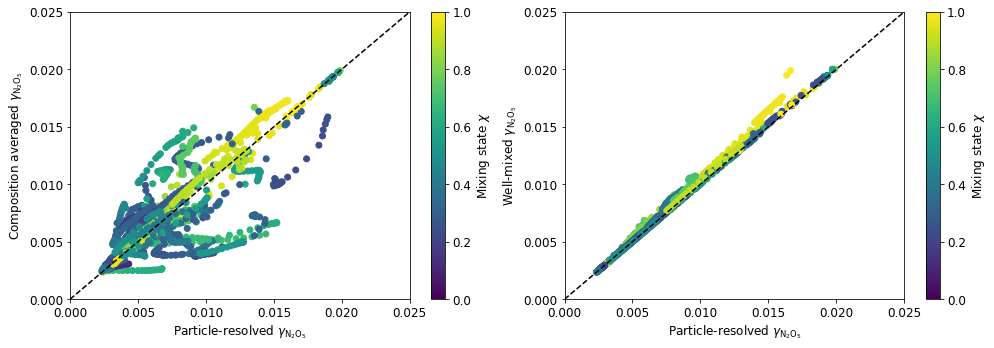

In [4]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.xlim(0,2.5e-2);plt.ylim(0,2.5e-2)
plt.plot([0,3e-2],[0,3e-2],'--', color='k')
a = plt.scatter(gamma_pop[0,:,:].ravel(), gamma_pop[1,:,:].ravel(), c=chi.ravel())
cbar = plt.colorbar(a)
plt.clim(0,1.0)
plt.xlabel(r'Particle-resolved $\gamma_{\rm N_2O_5}$')
plt.ylabel(r'Composition averaged $\gamma_{\rm N_2O_5}$')
cbar.ax.set_ylabel('Mixing state $\chi$')
plt.tight_layout()

plt.subplot(1,2,2)
plt.xlim(0,2.5e-2);plt.ylim(0,2.5e-2)
plt.plot([0,3e-2],[0,3e-2],'--', color='k')
a = plt.scatter(gamma_pop[0,:,:].ravel(), gamma_pop[2,:,:].ravel(), c=chi.ravel())
cbar = plt.colorbar(a)
plt.clim(0,1.0)
plt.xlabel(r'Particle-resolved $\gamma_{\rm N_2O_5}$')
plt.ylabel(r'Well-mixed $\gamma_{\rm N_2O_5}$')
cbar.ax.set_ylabel('Mixing state $\chi$')
plt.tight_layout()

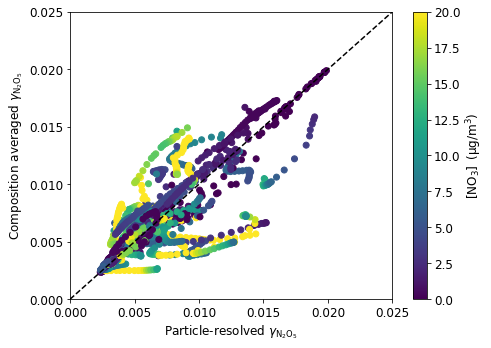

In [18]:
plt.figure(figsize=(7,5))

plt.xlim(0,2.5e-2);plt.ylim(0,2.5e-2)
plt.plot([0,3e-2],[0,3e-2],'--', color='k')
a = plt.scatter(gamma_pop[0,:,:].ravel(), gamma_pop[1,:,:].ravel(), c=df["bulk_no3_masses"])
cbar = plt.colorbar(a)
plt.clim(0,20)
plt.xlabel(r'Particle-resolved $\gamma_{\rm N_2O_5}$')
plt.ylabel(r'Composition averaged $\gamma_{\rm N_2O_5}$')
cbar.ax.set_ylabel(r'$[\rm NO_3]\,\ (µg/m^3)$')
plt.tight_layout()

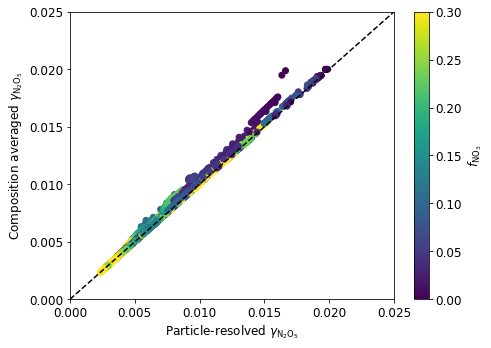

In [6]:
plt.figure(figsize=(7,5))

plt.xlim(0,2.5e-2);plt.ylim(0,2.5e-2)
plt.plot([0,3e-2],[0,3e-2],'--', color='k')
a = plt.scatter(gamma_pop[0,:,:].ravel(), gamma_pop[2,:,:].ravel(), c=df["no3_frac"])
cbar = plt.colorbar(a)
plt.clim(0,0.3)
plt.xlabel(r'Particle-resolved $\gamma_{\rm N_2O_5}$')
plt.ylabel(r'Composition averaged $\gamma_{\rm N_2O_5}$')
cbar.ax.set_ylabel(r'$ f_{\rm NO_3}$')
plt.tight_layout()

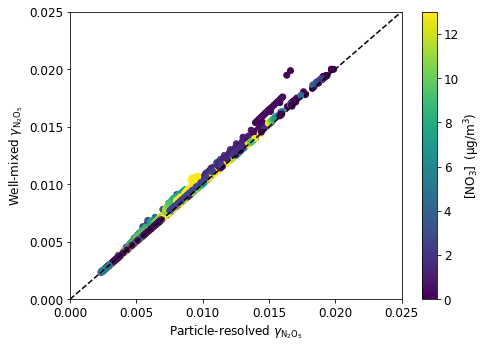

In [6]:
plt.figure(figsize=(7,5))

plt.xlim(0,2.5e-2);plt.ylim(0,2.5e-2)
plt.plot([0,3e-2],[0,3e-2],'--', color='k')
a = plt.scatter(gamma_pop[0,:,:].ravel(), gamma_pop[2,:,:].ravel(), c=df["bulk_no3_masses"])
cbar = plt.colorbar(a)
plt.clim(0,13)
plt.xlabel(r'Particle-resolved $\gamma_{\rm N_2O_5}$')
plt.ylabel(r'Well-mixed $\gamma_{\rm N_2O_5}$')
cbar.ax.set_ylabel(r'$[\rm NO_3]\,\ (µg/m^3)$')
plt.tight_layout()

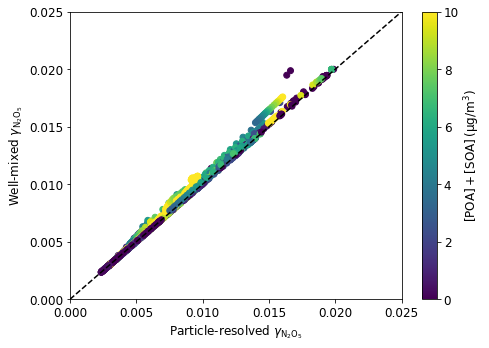

In [10]:
plt.figure(figsize=(7,5))

plt.xlim(0,2.5e-2);plt.ylim(0,2.5e-2)
plt.plot([0,3e-2],[0,3e-2],'--', color='k')
a = plt.scatter(gamma_pop[0,:,:].ravel(), gamma_pop[2,:,:].ravel(), c=df["org"])
cbar = plt.colorbar(a)
plt.clim(0,10)
plt.xlabel(r'Particle-resolved $\gamma_{\rm N_2O_5}$')
plt.ylabel(r'Well-mixed $\gamma_{\rm N_2O_5}$')
cbar.ax.set_ylabel(r'$[\rm POA]+[\rm SOA] \, (\mu g /m^3)$')
plt.tight_layout()

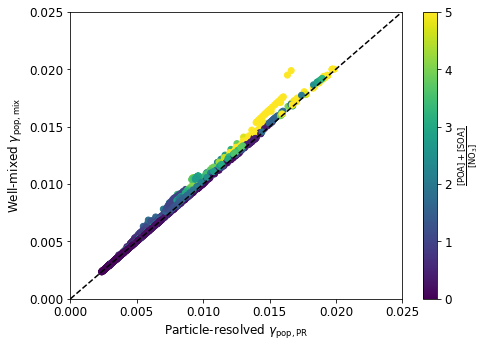

In [4]:
plt.figure(figsize=(7,5))

plt.xlim(0,2.5e-2);plt.ylim(0,2.5e-2)
plt.plot([0,3e-2],[0,3e-2],'--', color='k')
a = plt.scatter(gamma_pop[0,:,:].ravel(), gamma_pop[2,:,:].ravel(), c=df["org/no3"])
cbar = plt.colorbar(a)
plt.clim(0,5)
plt.xlabel(r'Particle-resolved $\gamma_{\rm pop,PR}$')
plt.ylabel(r'Well-mixed $\gamma_{\rm pop,mix}$')
cbar.ax.set_ylabel(r'$ \frac{[\rm POA]+[\rm SOA]}{[\rm NO_3]}$')
plt.tight_layout()

In [ ]:
plt.figure(figsize=(7,5))

plt.xlim(0,2.5e-2);plt.ylim(0,2.5e-2)
plt.plot([0,3e-2],[0,3e-2],'--', color='k')
a = plt.scatter(gamma_pop[0,:,:].ravel(), gamma_pop[2,:,:].ravel(), c=df["no3/org"])
cbar = plt.colorbar(a)
plt.clim(0,1)
plt.xlabel(r'Particle-resolved $\gamma_{\rm N_2O_5}$')
plt.ylabel(r'Composition averaged $\gamma_{\rm N_2O_5}$')
cbar.ax.set_ylabel(r'$ \frac{[\rm NO_3]}{[\rm POA]+[\rm SOA]}$')
plt.tight_layout()

In [8]:
gamma_pop_error_1 = (gamma_pop[1,:,:].ravel() - 
                   gamma_pop[0,:,:].ravel())/gamma_pop[0,:,:].ravel()
gamma_pop_error_2 = (gamma_pop[2,:,:].ravel() - 
                   gamma_pop[0,:,:].ravel())/gamma_pop[0,:,:].ravel()
d = {"gamma_pop_pr": gamma_pop[0,:,:].ravel(),
     "gamma_pop_comp": gamma_pop[1,:,:].ravel(),
     "gamma_pop_mix": gamma_pop[2,:,:].ravel(),
     "gamma_pop_error_1": gamma_pop_error_1 * 100,
     "gamma_pop_error_2": gamma_pop_error_2 * 100}
df = pd.DataFrame(data=d)

/data/keeling/a/yicenl2/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/data/keeling/a/yicenl2/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/data/keeling/a/yicenl2/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other argument

[{'mean': 2.9824484710408803, 'iqr': 25.893529889708315, 'cilo': -0.4087844890089708, 'cihi': 1.6530590694969987, 'whishi': 52.78715220601099, 'whislo': -50.32503322169033, 'fliers': array([-52.95122656, -54.82544851, -56.35581173, -57.53296237,
       -58.46240895, -59.35410967, -60.48452988, -61.47866877,
       -61.13845823, -60.73169533, -50.99628723, -52.6369549 ,
       -53.88471638, -55.27436516, -56.88442576, -58.3458585 ,
       -59.38433162, -60.12424818, -60.5802571 , -57.65051425,
       -58.30210595, -58.76169895, -59.04632184, -59.46488484,
       -59.3832221 , -59.56258761, -59.64095662, -59.36300086,
       -59.0407758 , -59.06535681, -59.2913439 , -60.10299567,
       -60.77494237, -61.36922651, -61.66930298, -61.83660276,
       -61.61563222, -61.15089492, -60.45213796, -59.55602796,
       -58.55788367, -57.38802503, -56.16857815, -54.99134181,
       -52.45843304, -54.77899935, -56.57031015, -59.09101667,
       -55.76889219, -56.04421985, -56.18563215, -55.98240633

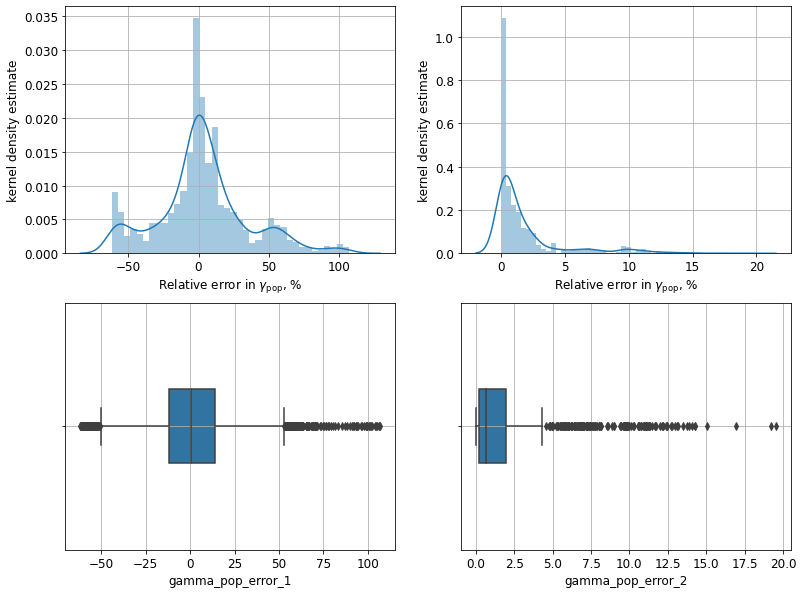

In [9]:
plt.figure(figsize=(13,10))
import seaborn as sns

plt.subplot(2,2,1)
ax1 = sns.distplot(df.gamma_pop_error_1.dropna())
ax1.set_xlabel(r'Relative error in $\gamma_{\rm pop}$, %')
ax1.set_ylabel('kernel density estimate')
ax1.grid()

plt.subplot(2,2,2)
ax1 = sns.distplot(df.gamma_pop_error_2.dropna())
ax1.set_xlabel(r'Relative error in $\gamma_{\rm pop}$, %')
ax1.set_ylabel('kernel density estimate')
ax1.grid()

plt.subplot(2,2,3)
ax2 = sns.boxplot(df.gamma_pop_error_1, width = 0.3)
ax2.grid()

plt.subplot(2,2,4)
ax2 = sns.boxplot(df.gamma_pop_error_2, width = 0.3)
ax2.grid()

from matplotlib.cbook import boxplot_stats
box_values_1 = boxplot_stats(df.gamma_pop_error_1.dropna())
box_values_2 = boxplot_stats(df.gamma_pop_error_2.dropna())

print(box_values_1)
print(box_values_2)